##### Decision Tree Webinar
- Robert Manriquez
- Emeritus + Columbia ADS

## Objectives:
* ##### Become familiar with theory of how Decision Tree algorithms work "under the hood."
    - Splitting data based on "information gain," one feature at a time.
    - Information gain is calculated via 'Entropy','Gini Impurity' from separating subsets of the data.
    - The data set is randomly split until maximum information gain is obtained, then each resulting subset is split further in this manner.
* ##### Build a decision tree model using the scikit learn's implementation for both classification and regression.
    - Imported from sklearn.tree (DecisionTreeClassifier, DecisionTreeRegressor)
    
* ##### Understand key tuning parameters.
    - Maximum tree depth, maximum number of features, leaf nodes, leaf splitting.
    
* ##### Learn the workflow of building a Decision Tree and interpreting the output tree plot.

### Information Gain, splitting classes by Entropy or Gini

# $$ \text{Entropy} = -\sum_{i=1}^{classes} p(i\;|\;t) * \;log_2( p(i\;|\;t) ) $$

# $$ \text{Gini} = \sum_{i=1}^{classes} p(i\;|\;t)*(1 - p(i\;|\;t)) $$

In [1]:
# Adapted from Python Machine Learning 2nd Edition
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

### This is a less commonly used metric, but still worth seeing.
def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure(figsize = (8,6))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)','Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2.5, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False, prop={'size': 12})

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.tick_params(labelsize=14)
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)', size = 14)
plt.ylabel('Impurity Index', size = 14)
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 800x600 with 1 Axes>

#### Let's take a closer look at how entropy and gini behave for varying ratios of two classes.

In [2]:
import pandas as pd

x = np.arange(0.05,1,0.05)

scores = pd.DataFrame(
{
    "%Class_A": x,
    "%Class_B": 1 - x,
    "Entropy": [entropy(x) if x != 0 else 0 for x in x],
    "Gini"   : [gini(x) if x != 0 else 0 for x in x],
})

In [3]:
scores

,%Class_A,%Class_B,Entropy,Gini
0,0.05,0.95,0.286397,0.095
1,0.10,0.90,0.468996,0.180
2,0.15,0.85,0.609840,0.255
3,0.20,0.80,0.721928,0.320
4,0.25,0.75,0.811278,0.375
5,0.30,0.70,0.881291,0.420
6,0.35,0.65,0.934068,0.455
7,0.40,0.60,0.970951,0.480
8,0.45,0.55,0.992774,0.495
9,0.50,0.50,1.000000,0.500


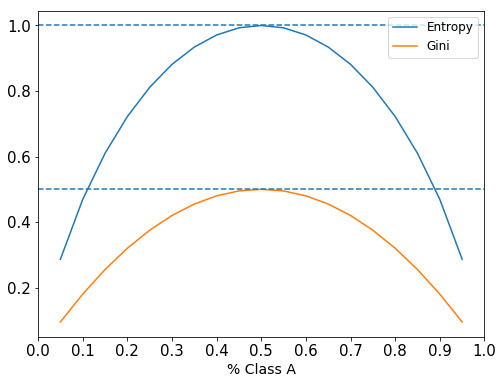

In [4]:
plt.figure(figsize = (8,6))
ax1 = plt.plot(scores['%Class_A'], scores.Entropy)
ax2 = plt.plot(scores['%Class_A'], scores.Gini)
plt.axhline(y = scores.Entropy.max(), linestyle = '--')
plt.axhline(y = scores.Gini.max(), linestyle = '--')
plt.xlabel('% Class A', fontsize = 14)
plt.legend(loc='upper right',fancybox=True, prop={'size': 12})
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.show()

## So, how can this method be used to build a machine learning algorithm?
- Let's take an example using sklearn's built in Iris data set.  We'll compare an arbitrary classification rule, calculate the Gini of the resulting subsets to find the "information gained," then compare it to sklearn's model.
- We'll start by analyzing the Iris data, then selecting subset to work with.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')

In [6]:
data = load_iris()
# to view documentaton, try running "print(data.DESCR)" in a cell

In [7]:
# Prepare dataframe from load_iris()

df = pd.DataFrame(data = data.data, columns = data.feature_names)
df['species'] = data.target

def flower_map(x):
    if x == 0:
        return "Setosa"
    elif x == 1:
        return "Versicolour"
    elif x == 2:
        return "Virginica"
    
df['species'] = df['species'].map(flower_map)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


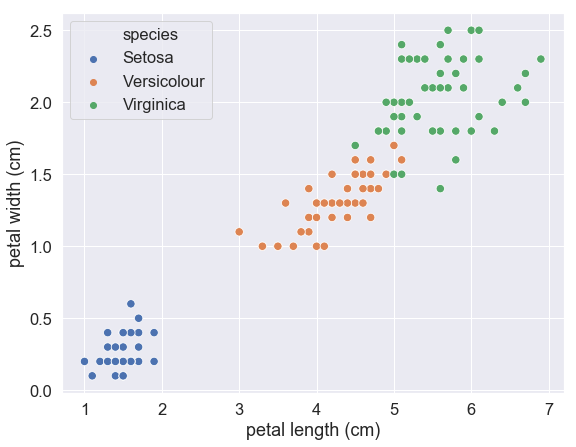

In [9]:
sns.set(font_scale=1.5)
plt.figure(figsize=(9,7))
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'],
                hue = df['species'], s = 70)

In [10]:
## Filtering out "Virginica" to just to compare 2 flower types

two_flowers_df = df.loc[df.species != "Virginica", :].copy()

In [11]:
def gini_sum(p_list):
    return np.sum([x * (1 - x) for x in p_list])

In [12]:
two_flowers_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
two_flowers_df.species.value_counts()

Setosa         50
Versicolour    50
Name: species, dtype: int64

In [14]:
top_leaf = gini_sum([50/100, 50/100])
print("Top Leaf Gini : ", top_leaf, '\n')

## Choosing an arbitrary split based on petal width (see scatter plot above)
leaf_1 = two_flowers_df.loc[two_flowers_df['petal width (cm)'] <= 0.2, 'species']
leaf_2 = two_flowers_df.loc[two_flowers_df['petal width (cm)'] > 0.2, 'species']

print("Leaf 1 Contents:")
print(leaf_1.value_counts(), '\n')
print("Leaf 2 Contents:")
print(leaf_2.value_counts(), '\n')

leaf_1_gini = gini_sum([34/34])
leaf_2_gini = gini_sum([50/66, 16/60])

leaf_1_wt = 34/100
leaf_2_wt = 66/100

bot_leaf_total = (leaf_1_wt * leaf_1_gini) + (leaf_2_wt * leaf_2_gini)

print("Bottom leaf total Gini : ",  round(bot_leaf_total,4) )
print("Information Gain = ", round(top_leaf - bot_leaf_total,4) )

Top Leaf Gini :  0.5 

Leaf 1 Contents:
Setosa    34
Name: species, dtype: int64 

Leaf 2 Contents:
Versicolour    50
Setosa         16
Name: species, dtype: int64 

Bottom leaf total Gini :  0.2503
Information Gain =  0.2497


![img](example_tree.jpg)

### Using our "rule" :
### * If the flower has petal width <= 0.2 cm, we'd label it as Setosa.
### * If it's petal width is > 0.2 cm, we'd label it as the majority class of Versocolour.

- Did this approach work?  How well is this rule working?
        - We're getting 84% Accuracy like this, but still mis-classifying 16 flowers as "Verisolor" when they are actually Setosa.
- Now let's compare Sklearn's model, which will automatically pick the best "rules" to split this data to obtain maximum information gain (via gini metric) and make classifications.

In [15]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = two_flowers_df.loc[:, features]
y = two_flowers_df['species']

dtc_model = DecisionTreeClassifier(random_state = 1)

dtc_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [16]:
print("Training Accuracy : {}".format( dtc_model.score(X, y) ))

Training Accuracy : 1.0


In [17]:
pd.DataFrame({"feature" : features, "importance" : dtc_model.feature_importances_}).sort_values(by = 'importance')

,feature,importance
0,sepal length (cm),0.0
1,sepal width (cm),0.0
2,petal length (cm),0.0
3,petal width (cm),1.0


In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def Plot_Tree(model, class_names, feature_names):
    dot_data = StringIO() 
    export_graphviz(model, out_file=dot_data,  
                    filled=False, rounded=True,
                    special_characters=True,
                    class_names = class_names,
                    feature_names= feature_names)  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return display(Image(graph.create_png()))

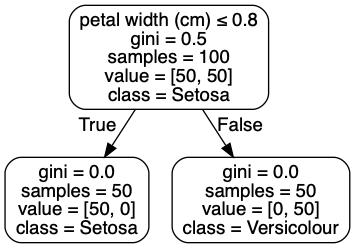

In [19]:
Plot_Tree(dtc_model, class_names = ['Setosa','Versicolour'], feature_names = features)

### Sklearn's Tree got 100% accuracy by usng the adjusted rule of petal width <= 0.8 cm!
-  Let's check the information gain and see why it figured it out.

In [20]:
leaf_1 = two_flowers_df.loc[two_flowers_df['petal width (cm)'] <= 0.8, 'species']
leaf_2 = two_flowers_df.loc[two_flowers_df['petal width (cm)'] > 0.8, 'species']
print("Leaf 1 rows : ", leaf_1.shape[0])
print("Leaf 2 rows : ", leaf_2.shape[0])

top_leaf = gini_sum([50/100, 50/100])
print("Top Leaf Gini : ", top_leaf)

print(leaf_1.value_counts())
print(' ')
print(leaf_2.value_counts())

bot_leaf = 50/100 * gini_sum([50/50]) + 50/100 * gini_sum([50/50, 50/50])

print("Next leaf total Gini : ",  round(bot_leaf,2) )
print("\nInformation Gain = ", round(top_leaf - bot_leaf, 2) )

Leaf 1 rows :  50
Leaf 2 rows :  50
Top Leaf Gini :  0.5
Setosa    50
Name: species, dtype: int64
 
Versicolour    50
Name: species, dtype: int64
Next leaf total Gini :  0.0

Information Gain =  0.5


### "Petal width <= 0.2 cm" rule yielded Information Gain =  0.2497
### "Petal width <= 0.8 cm" rule gave us a more information gain (0.5)

* This is how the Decision Tree how determines the best splits.  It'll randomly split data one feature at a time and pick the "rules" that result in the highest information gain (which comes from leaf compositions with the highest gini or entropy).
* The Decision Tree will continue splitting the data into subsets until the leaves have the highest purity possible OR until it reaches a specified maximum depth or number of leaf nodes.  These parameters can be tuned!

### Below we will run this algorithm again, but using all three flowers and allowing the tree to split leaves until completion.

Training Accuracy : 1.0
Training Accuracy : 0.9555555555555556


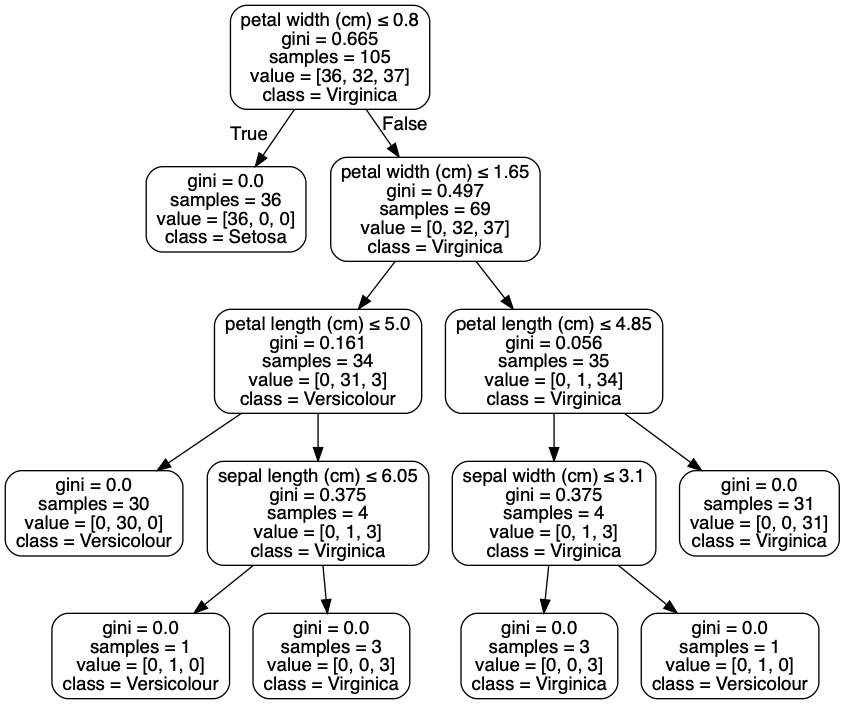

In [21]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df.loc[:, features]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

dtc_model = DecisionTreeClassifier()

dtc_model.fit(X_train, y_train)

print("Training Accuracy : {}".format( dtc_model.score(X_train, y_train) ))
print("Training Accuracy : {}".format( dtc_model.score(X_test , y_test ) ))

Plot_Tree(dtc_model, class_names = ['Setosa','Versicolour', 'Virginica'], feature_names = features)

### Pros:
- Computationally quick compared to Linear models
- Non-parametric (more suited for working with non-linear data)
- "White Box" approach (results and methods are easy to interpret)
- Handles multi-colinearity well since it only considers one variable at a time.

### Cons:
- "Greedy" algorithm, will continue splitting until it "learns" the data set.  Very prone to over-fitting since it favors making "locally optimal" decisions.
- high variance, small changes in the data set can result in a very different tree of "rules".
- Powerful alogrithm, but often requires ensembling (ie Random Forest) to really be useful, which can become computationally expensive.

### If time permits, let's tune our tree's features!

Measure           | What it does
------------------|-------------
max_depth         | How many splits / "rules" will my tree be allowed to do? (maximum nodes)
criterion         | The "loss" function to train my tree on (can be entropy, gini, etc).
max_features      | The limit to how many features my tree can use.
max_leaf_nodes    | The limit of how many leaves each split can produce.
min_samples_leaf  | The minimum number of samples required to produce a leaf. 
min_samples_split | Number of samples required in the lead before splitting.

In [22]:
dc = DecisionTreeClassifier()

params = {
    
    "max_depth"        : [1,2,3,4,5,10],
    "criterion"        : ['entropy', 'gini'],
    "max_features"     : [0.5, 1],
    "max_leaf_nodes"   : [2,3,5],
    'min_samples_leaf': [2,3,5],
    'min_samples_split' : [2,3,5]
}

gs = GridSearchCV(dc, params, cv = 3)

gs.fit(X_train, y_train)

print("Training Accuracy : {}".format( gs.score(X_train, y_train) ))
print("Training Accuracy : {}".format( gs.score(X_test , y_test ) ))

Training Accuracy : 0.9619047619047619
Training Accuracy : 0.9555555555555556


In [23]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 1,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

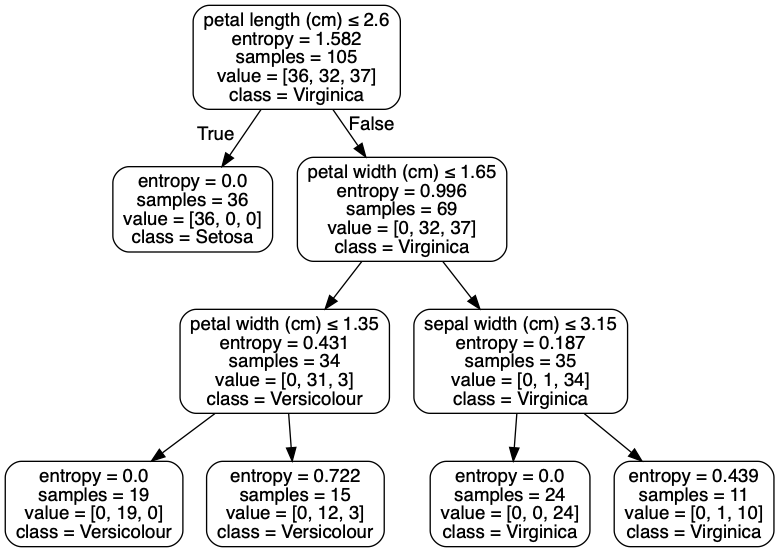

In [24]:
Plot_Tree(gs.best_estimator_, class_names = ['Setosa','Versicolour', 'Virginica'], feature_names = features)